In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fia-f1-19502019-data/race_wins_1950-2020.csv
/kaggle/input/fia-f1-19502019-data/race_results_1950-2020.csv
/kaggle/input/fia-f1-19502019-data/drivers_championship_1950-2020.csv
/kaggle/input/fia-f1-19502019-data/70_Anniversary Q3_LapbyLap.csv
/kaggle/input/fia-f1-19502019-data/fastest_laps_1950-2020.csv
/kaggle/input/fia-f1-19502019-data/qualifying_times_1950-2005.csv
/kaggle/input/fia-f1-19502019-data/70_Anniversary Q2_LapbyLap.csv
/kaggle/input/fia-f1-19502019-data/70_Anniversary Q1_LapbyLap.csv
/kaggle/input/fia-f1-19502019-data/fastest_laps_all_drivers_all_race_1950-2020.csv
/kaggle/input/fia-f1-19502019-data/constructors_championship_1958-2020.csv
/kaggle/input/fia-f1-19502019-data/70_Anniversary_Race_LapbyLap .csv
/kaggle/input/fia-f1-19502019-data/qualifying_times_2006-2020.csv


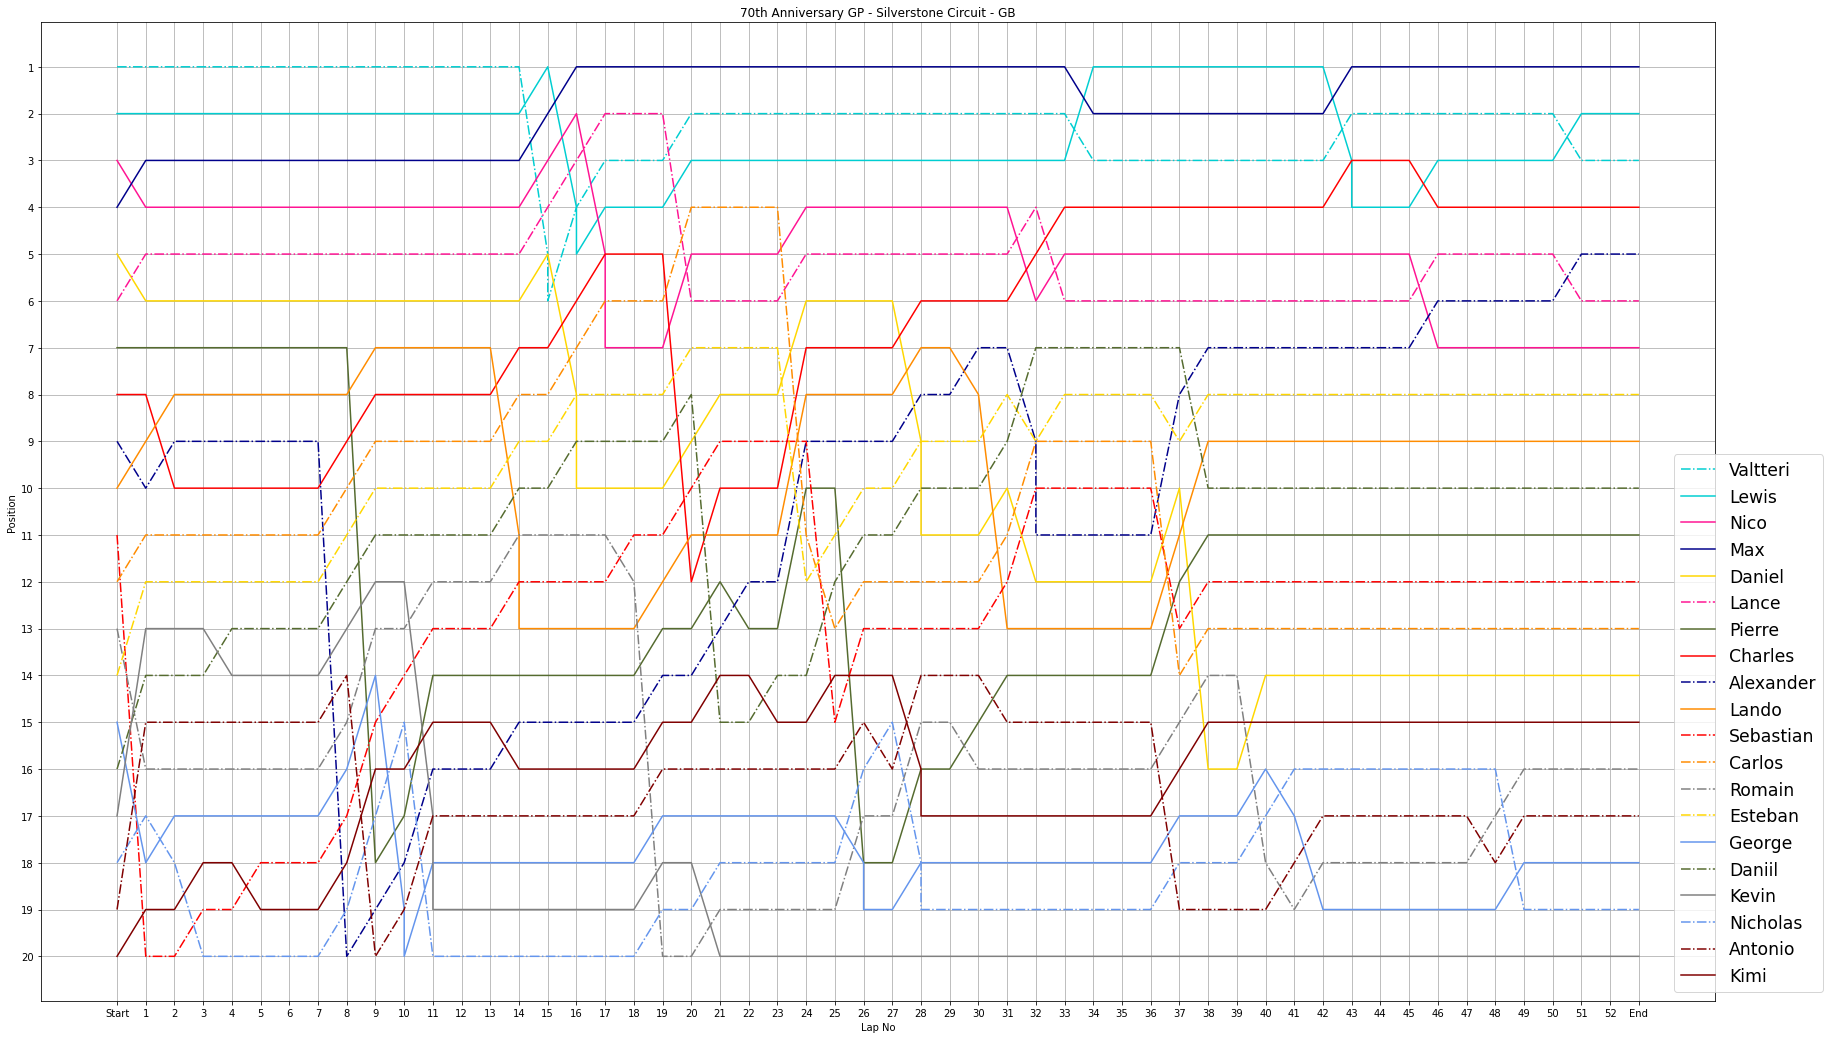

In [2]:
from matplotlib import pyplot as plt

df = pd.read_csv('/kaggle/input/fia-f1-19502019-data/70_Anniversary_Race_LapbyLap .csv')

ndf = df.loc[:, ['driver', 'lap no', 'pos']].copy()
g = ndf.groupby(['driver', 'lap no', 'pos']).groups
rd = []
rlap = []
rpos = []
for data in g:
    rd.append(data[0])
    rlap.append(data[1])
    rpos.append(data[2])
ind = 0
fli = [
    [1, 'Valtteri', 0]
    , [2, 'Lewis', 0]
    , [3, 'Nico', 0]
    , [4, 'Max', 0]
    , [5, 'Daniel', 0]
    , [6, 'Lance', 0]
    , [7, 'Pierre', 0]
    , [8, 'Charles', 0]
    , [9, 'Alexander', 0]
    , [10, 'Lando', 0]
    , [11, 'Sebastian', 0]
    , [12, 'Carlos', 0]
    , [13, 'Romain', 0]
    , [14, 'Esteban', 0]
    , [15, 'George', 0]
    , [16, 'Daniil', 0]
    , [17, 'Kevin', 0]
    , [18, 'Nicholas', 0]
    , [19, 'Antonio', 0]
    , [20, 'Kimi', 0]]
fli.sort(reverse=True)
col = {'Lewis':'#00CED1','Valtteri':'#00CED1','Nico':'#FF1493','Max':'#00008B','Daniel':'#FFD700','Lance':'#FF1493','Pierre':'#556B2F','Charles':'#FF0000','Alexander':'#00008B','Lando':'#FF8C00','Sebastian':'#FF0000','Carlos':'#FF8C00','Romain':'#808080','Esteban':'#FFD700','George':'#6495ED','Daniil':'#556B2F','Kevin':'#808080','Nicholas':'#6495ED','Antonio':'#800000','Kimi':'#800000'}
st = {'Lewis':'-','Valtteri':'-.','Nico':'-','Max':'-','Daniel':'-','Lance':'-.','Pierre':'-','Charles':'-','Alexander':'-.','Lando':'-','Sebastian':'-.','Carlos':'-.','Romain':'-.','Esteban':'-.','George':'-','Daniil':'-.','Kevin':'-','Nicholas':'-.','Antonio':'-.','Kimi':'-'}
for i in range(len(rlap)):
    if rlap[i] not in range(1, 53):
        ind = i
        break

for i in range(ind, ind + 20):
    rlap[i] = 53
le = len(rlap)
for i in range(ind + 20, le):
    rd.pop()
    rlap.pop()
    rpos.pop()
for data in fli:
    rd.insert(0, data[1])
    rlap.insert(0, data[2])
    rpos.insert(0, data[0])
rdf = pd.DataFrame(list(zip(rd, rlap, rpos)), columns=['driver', 'lap', 'pos'])

dr = list(rdf.loc[:, 'driver'])
drivers = dr[0:20]
fig = plt.figure(figsize=(30,18))
for dri in drivers:
    dr = list(rdf.loc[rdf['driver'] == dri, 'lap'])
    pos = list(rdf.loc[rdf['driver'] == dri, 'pos'])
    dup = []
    for i in dr:
        if dr.count(i) > 1:
            dup.append(dr.index(i))
            dr.pop(dr.index(i))
    for i in dup:
        pos.pop(i)
    plt.plot(dr, pos,color=col[dri],ls=st[dri], label=dri)

plt.legend(loc=4,bbox_to_anchor=(1.07,0), fontsize='xx-large')
plt.grid()
plt.title('70th Anniversary GP - Silverstone Circuit - GB')
lab = []
lab.append('Start')
lab.extend(list(i for i in range(1,53)))
lab.append('End')

plt.yticks(np.arange(1, 21))
plt.ylabel('Position')
plt.xlabel('Lap No')
plt.xticks(np.arange(0, 54),lab)
plt.gca().invert_yaxis()
plt.show()
